Intro

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.


In [78]:
#Let's go thgough the data we have downloaded
import pandas as pd
import requests
import numpy
import json
import matplotlib.pyplot as plt
%matplotlib inline

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(link)

#Saving file to system
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

image_prediction = pd.read_csv('image_predictions.tsv', sep = '\t') # Since it is a TSV file we need to use tab as seperator
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [2]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


# To gather

Retweet count and favorite count.

# Keep in mind 

Need original tweets related data only. No retweet related info.
<br>1- 8 Data quality and 2 tidiness issues
<br>2 - Don't gather data beyond August 1, 2017
<br>3 - Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.
<br>4 - Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.
<br>5 - Create a 300-600 word written report called wrangle_report.pdf or wrangle_report.html that briefly describes your wrangling efforts. This is to be framed as an internal document.
<br>6 - Create a 250-word-minimum written report called act_report.pdf or act_report.html that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

In [3]:
# Authentication and connecting to twitter API

import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)


In [4]:
twitter_archive.tweet_id.nunique() # Entire set is unique, no cleaning requried

all_tweet_ids = twitter_archive['tweet_id']
all_tweet_ids = all_tweet_ids.head(50) # Taking 50 as the below for loop took forever to load in the complete dataset so making the data set smaller here.
all_tweet_ids.count()

50

In [5]:
# We already know from the project overview that few tweets won't be available

nan_tweets = []
proper_tweets = []
import time
start = time.time()
for tweet_id in all_tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json 
        # Let's
        favorites = tweet['favorite_count'] # number of favorites for the tweet
        retweets = tweet['retweet_count'] # number of retweets
        proper_tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets)})
    except Exception as e:
        nan_tweets.append(tweet_id) #tweets with problems like no data, etc
        
# end time for excution
end = time.time()

#printing time for execution
print("Total time taken for execution", end - start)

Total time taken for execution 73.76856255531311


In [6]:
len(proper_tweets), len(nan_tweets)

(49, 1)

Thus it was a smart thing to choose only 50 as if 50 -> 71 secs. 2thousand something tweets would be 30 mins of load time.
<br>However you can remove the all_tweet_ids = all_tweet_ids.head(50) if interested in all the tweets.

We need to save the above in tweet_json.txt file 

In [7]:
tweets_json = pd.DataFrame(proper_tweets, columns = ['tweet_id', 'favorites', 'retweets'])

tweets_json.to_csv('tweet_json.txt', index=False)

Opening the file in text editor works just fine

In [8]:
tweet_json = pd.read_csv('tweet_json.txt') # opening it program to test
tweet_json.head(5)

,tweet_id,favorites,retweets
0,892420643555336193,37845,8255
1,892177421306343426,32517,6097
2,891815181378084864,24482,4038
3,891689557279858688,41197,8405
4,891327558926688256,39375,9103


So we now have data in 3 files, twitter_archive, image_prediction and tweet_json. However since we have only 50 data for tweet_json I will make 3 new file consisting data for those 50 tweets only.

In [9]:
temp = tweet_json['tweet_id']
new_twitter_archive = twitter_archive[twitter_archive['tweet_id'].isin(temp)]
new_twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
new_image_prediction = image_prediction[image_prediction['tweet_id'].isin(temp)]
new_image_prediction.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2029,882762694511734784,https://pbs.twimg.com/media/DEAz_HHXsAA-p_z.jpg,1,Labrador_retriever,0.850050,True,Chesapeake_Bay_retriever,0.074257,True,flat-coated_retriever,0.015579,True
2030,882992080364220416,https://pbs.twimg.com/media/DEEEnIqXYAAiJh_.jpg,1,Eskimo_dog,0.466778,True,Siberian_husky,0.406044,True,dingo,0.073414,False
2031,883117836046086144,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,2,golden_retriever,0.949562,True,Labrador_retriever,0.045948,True,kuvasz,0.002471,True
2032,883360690899218434,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,1,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True
2033,883482846933004288,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True


Now that we have our data, we can identify quality and tidiness problems.
<br>Since my goal is to find the following my data quality and tidiness would reflect according to the below


<br>1 - What is the highest rating given
<br>2 - Value vs count of the rating, mode of rating here, along with visualizing the same
<br>3 - Which tweet received the maximum number of likes and what was it's rating

In [11]:
new_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 49
Data columns (total 17 columns):
tweet_id                      49 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     49 non-null object
source                        49 non-null object
text                          49 non-null object
retweeted_status_id           2 non-null float64
retweeted_status_user_id      2 non-null float64
retweeted_status_timestamp    2 non-null object
expanded_urls                 48 non-null object
rating_numerator              49 non-null int64
rating_denominator            49 non-null int64
name                          49 non-null object
doggo                         49 non-null object
floofer                       49 non-null object
pupper                        49 non-null object
puppo                         49 non-null object
dtypes: float64(4), int64(3), object(10)
memory usage: 6.9+ KB


I would like to start by tiding data as much as possible. So I will drop irrelevant columns from the above df

In [12]:
new_twitter_archive = new_twitter_archive[['tweet_id','text','rating_numerator','rating_denominator','name']] 

In [13]:
new_twitter_archive.head(5) # looks good now,  I kept the text column as I would be interested in reading it for higesht rated dog

,tweet_id,text,rating_numerator,rating_denominator,name
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin


In [14]:
new_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 2029 to 2074
Data columns (total 12 columns):
tweet_id    45 non-null int64
jpg_url     45 non-null object
img_num     45 non-null int64
p1          45 non-null object
p1_conf     45 non-null float64
p1_dog      45 non-null bool
p2          45 non-null object
p2_conf     45 non-null float64
p2_dog      45 non-null bool
p3          45 non-null object
p3_conf     45 non-null float64
p3_dog      45 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 3.6+ KB


In [15]:
new_image_prediction = new_image_prediction[['tweet_id','jpg_url','img_num','p1','p1_dog']]

In [16]:
new_image_prediction.head(5) #looks good, need img url and img num to check out the highest rated dog image, although the tweet id will lead to it anyway but still

,tweet_id,jpg_url,img_num,p1,p1_dog
2029,882762694511734784,https://pbs.twimg.com/media/DEAz_HHXsAA-p_z.jpg,1,Labrador_retriever,True
2030,882992080364220416,https://pbs.twimg.com/media/DEEEnIqXYAAiJh_.jpg,1,Eskimo_dog,True
2031,883117836046086144,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,2,golden_retriever,True
2032,883360690899218434,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,1,chow,True
2033,883482846933004288,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,True


I would say merging tweet_json in new_twitter_archive would make it convenient for us for accessing data and data more tidy

In [17]:
tidy_archive = pd.merge(new_twitter_archive, tweet_json, left_on='tweet_id', right_on='tweet_id', how='left')

In [18]:
tidy_archive.head()
tidy_image_prediction = new_image_prediction #  creating it for easy name reference

Since we have created so many df. Meantioning the 2 imps right now for reference.
<br>tidy_archive
<br>tidy_image_prediction

Now let's focus on data quality issues

In [19]:
# Starting with tidy_archive
tidy_archive.tweet_id.count() , tidy_image_prediction.tweet_id.count()

(49, 45)

In [20]:
tidy_archive.rating_numerator.value_counts() # First data quality issues spotted we know that no dog is less than 10, need to remove the 5

13    30
12    14
14     4
5      1
Name: rating_numerator, dtype: int64

In [21]:
tweet_id_5rating = tidy_archive[tidy_archive['rating_numerator'] == 5] 
tweet_id_5rating  = int(tweet_id_5rating['tweet_id'])
tweet_id_5rating

883482846933004288

In [22]:
tidy_archive.drop((tidy_archive[tidy_archive['tweet_id'] == tweet_id_5rating]).index,  axis=0 ,inplace = True )
tidy_image_prediction.drop((tidy_image_prediction[tidy_image_prediction['tweet_id'] == tweet_id_5rating]).index, axis=0, inplace =True)


In [23]:
tidy_archive.tweet_id.count(), tidy_image_prediction.tweet_id.count()

(48, 44)

As we can see the number of rows still do not match. Let's make it even
<br>This is because we checked it against the tweet_json and not against each other
<br>Instead of keeping it as two different tables, we can merge them too as there is relatively less column

In [24]:
final = pd.merge(tidy_archive, tidy_image_prediction, left_on='tweet_id', right_on='tweet_id', how='left')
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 11 columns):
tweet_id              48 non-null int64
text                  48 non-null object
rating_numerator      48 non-null int64
rating_denominator    48 non-null int64
name                  48 non-null object
favorites             48 non-null int64
retweets              48 non-null int64
jpg_url               44 non-null object
img_num               44 non-null float64
p1                    44 non-null object
p1_dog                44 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 4.5+ KB


In [25]:
final.dropna(axis = 0, inplace =True)

In [26]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 47
Data columns (total 11 columns):
tweet_id              44 non-null int64
text                  44 non-null object
rating_numerator      44 non-null int64
rating_denominator    44 non-null int64
name                  44 non-null object
favorites             44 non-null int64
retweets              44 non-null int64
jpg_url               44 non-null object
img_num               44 non-null float64
p1                    44 non-null object
p1_dog                44 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 4.1+ KB


In [27]:
sum(final.duplicated()) # data has no duplicate values

0

In [28]:
final 

,tweet_id,text,rating_numerator,rating_denominator,name,favorites,retweets,jpg_url,img_num,p1,p1_dog
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,37845,8255,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,False
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,32517,6097,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,True
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,24482,4038,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,True
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,41197,8405,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,False
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,39375,9103,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,True
5,891087950875897856,Here we have a majestic great white breaching ...,13,10,None,19796,3023,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,True
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,11571,1998,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,True
7,890729181411237888,When you watch your owner call another dog a g...,13,10,None,63845,18334,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,Pomeranian,True
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,27204,4151,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,Irish_terrier,True
9,890240255349198849,This is Cassie. She is a college pup. Studying...,14,10,Cassie,31188,7168,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,True


<br>While manually scrolling we can see that there is a retweet in the text, means it is not an original tweet and we should drop it
<br>Also there are names named none
<br>There is one favorites with 0 value, we know this can't be possible
<br>Image number is in float, it should be int
<br>Orange isn't a breed type so we'll remove that as well
<br>We are not interested in wrong predictions so we'll remove that as well


In [41]:
#Since we know there is only one in the entire column we choose to do so, else using patern matching or starts with function would suffice
final.drop((final[final['tweet_id'] == 885311592912609280]).index,  axis=0 ,inplace = True )

In [51]:
# Favorites with 0

final.drop((final[final['favorites'] == 0]).index,  axis=0 ,inplace = True )

In [45]:
# names named none
final.drop((final[final['name'] == "None"]).index,  axis=0 ,inplace = True )

In [52]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 47
Data columns (total 11 columns):
tweet_id              35 non-null int64
text                  35 non-null object
rating_numerator      35 non-null int64
rating_denominator    35 non-null int64
name                  35 non-null object
favorites             35 non-null int64
retweets              35 non-null int64
jpg_url               35 non-null object
img_num               35 non-null float64
p1                    35 non-null object
p1_dog                35 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 3.3+ KB


In [55]:
# Convert from float to integer
final['img_num'] =pd.to_numeric(final['img_num'], downcast='integer')

In [58]:
#Drop invalid breed type
final.drop((final[final['p1'] == "orange"]).index,  axis=0 ,inplace = True )

In [61]:
# Drop false predictions
final.drop((final[final['p1_dog'] == False]).index,  axis=0 ,inplace = True )

# Visualization
Reiterating this for convenience
<br>1 - What is the highest rating given 
<br>2 - Value vs count of the rating, mode of rating here, along with visualizing the same 
<br>3 - Which tweet received the maximum number of likes and what was it's rating

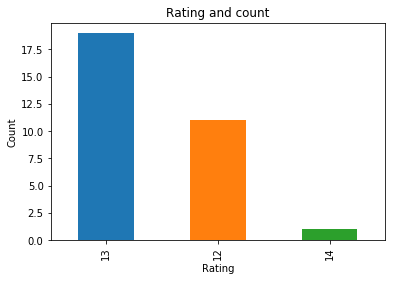

In [82]:
ax = final.rating_numerator.value_counts().plot(kind ="bar", title = "Rating and count");
ax.set(xlabel="Rating", ylabel="Count");


Thus the above visualization answers two of our question. Highest rating is 14 and the most number of rating given is 13. 

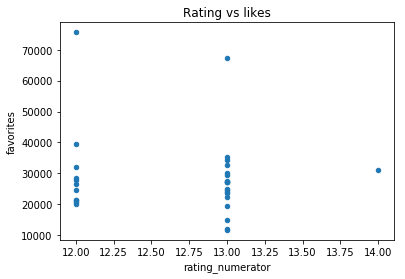

In [101]:
final.plot(x='rating_numerator', y='favorites', kind ="scatter" , title = "Rating vs likes");


In [102]:
temp = final.favorites.max()
final[final['favorites'] == temp]

,tweet_id,text,rating_numerator,rating_denominator,name,favorites,retweets,jpg_url,img_num,p1,p1_dog
37,884925521741709313,This is Earl. He found a hat. Nervous about wh...,12,10,Earl,75670,17750,https://pbs.twimg.com/media/DEfjEaNXkAAtPlj.jpg,1,Italian_greyhound,True


Through above visualization and code we know that highest likes is 75670 and it's rating is 12

In [103]:
final.to_csv("cleaned_data.csv", sep=',')

Last but not the least we saved the data in CSV file locally for future references.